# 第6章 回帰1:映画の興行収入の予測

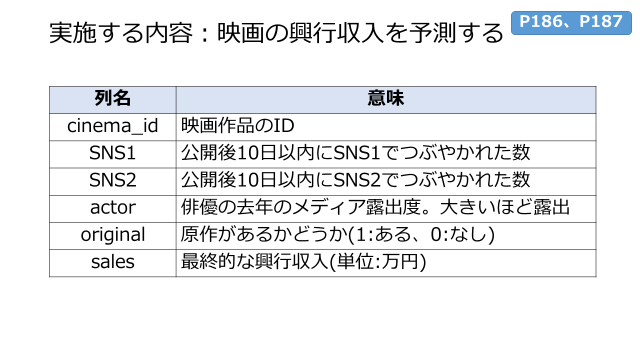

# 6.2 データの前処理

## CSVファイルの読み込み

コード6-1 cinema.csvの読み込み(P189)

In [ ]:
# pandasのインポート
import pandas as pd

# 'cinema.csv'からデータフレームを作成
df = pd.read_csv('cinema.csv')

# dfの先頭3行を表示する
df.head(3)

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


## 欠損値の確認と穴埋め

コード6-2 欠損値の確認(P190)

In [ ]:
# 各列の欠損値の有無（True/False）で表示
# df.isnull().any(axis = 0)
df.isnull().any()

cinema_id    False
SNS1          True
SNS2         False
actor         True
original     False
sales        False
dtype: bool

▶実行結果  
cinema_id    False  
SNS1          True  
SNS2         False  
actor         True  
original     False  
sales        False  
dtype: bool

コード6-3 欠損値の穴埋め(P191)

In [ ]:
# dfの欠損値を全て平均値で補完して、df2に代入する
df2 = df.fillna(df.mean())

# 各列の欠損値の有無（True/False）で表示し、穴埋めができたか確認
# df.isnull().any(axis = 0)
df2.isnull().any()

cinema_id    False
SNS1         False
SNS2         False
actor        False
original     False
sales        False
dtype: bool

▶実行結果  
cinema_id    False  
SNS1         False  
SNS2         False  
actor        False  
original     False  
sales        False  
dtype: bool

## 外れ値の確認

外れ値があると、予測性能が上がりにくい  
外れ値は、散布図を使うと視覚的に見つけやすい

**散布図を作成する**  
df**.plot(kind=●, x=x軸の列名, y=y軸の列名)**

**kind**  
グラフの種類。  
散布図は「scatter」を指定する。  
他にも、line、bar、histなどを指定できる

**x, y**  
グラフ作成に使用するデータフレームの列名

例）SNS2 と sales の散布図を描く  
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

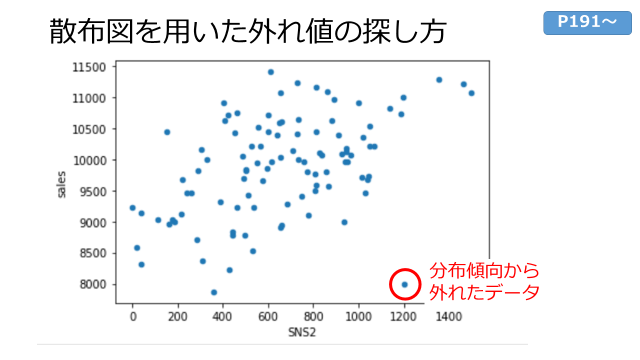

**Notebookのセルにグラフを表示するための設定**  
**%matplotlib inline**

現在のJupyterではデフォルトでinline表示になっている。  
そのため %matplotlib inline を実行しなくても画像が表示される

コード6-4 SNS2列とsales列の散布図を作成(P193)

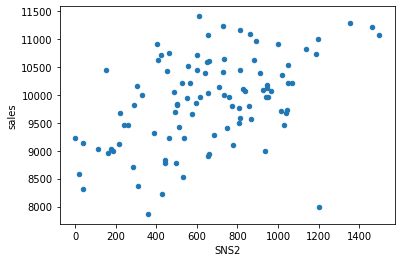

In [ ]:
# google colaboratory (Jupyter Notebook)上にグラフ描画するための設定
%matplotlib inline

# SNS2とsalesの散布図の作成
df2.plot(kind = 'scatter', x= 'SNS2', y = 'sales')

▶実行結果  
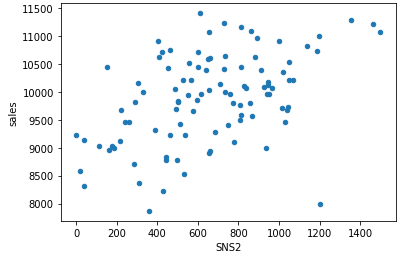

コード6-5 特徴量との組み合わせを変えて散布図を作成(P194)

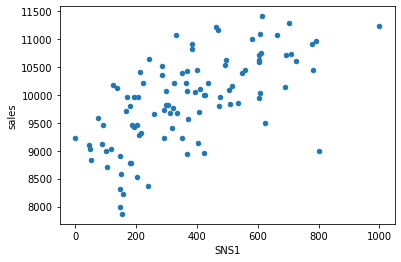

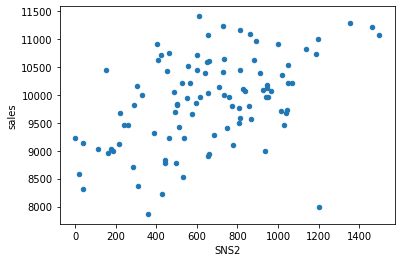

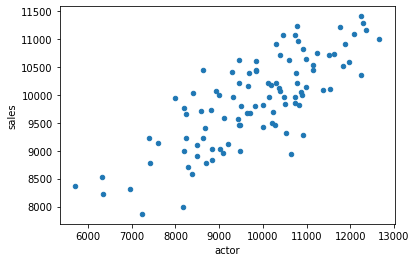

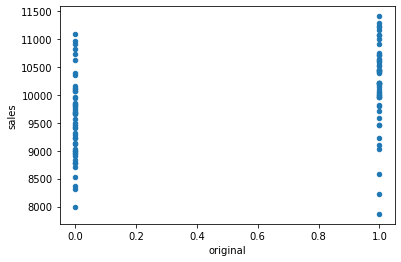

In [ ]:
df2.plot(kind = 'scatter', x = 'SNS1', y = 'sales')
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')
df2.plot(kind = 'scatter', x = 'actor', y = 'sales')
df2.plot(kind = 'scatter', x = 'original', y = 'sales')

コード6-x1 (Python復習)for文で、リストの値を順番に取得する

In [ ]:
items = ['項目1', '項目2', '項目3']

# for文でitemsの項目を1つずつ表示する
for item in items:
  print(item)

項目1
項目2
項目3


▶実行結果  
項目1  
項目2  
項目3  

コード6-X2 (Python復習)for文で、処理をスキップして次のループに移る

In [ ]:
items = ['項目1', '項目2', '項目3']

# for文でitemsの項目を1つずつ表示する
# ただし、「項目2」の場合は表示せずに次のループに移る
# for item in items:
  # if item == '項目2':
    # continue
  # print(item)
for item in items:
  if item != '項目2':
    print(item)

項目1
項目3


▶実行結果  
項目1  
項目3  

コード6-6 コード6-5と同じことをfor文との組み合わせで行う(P195) ★

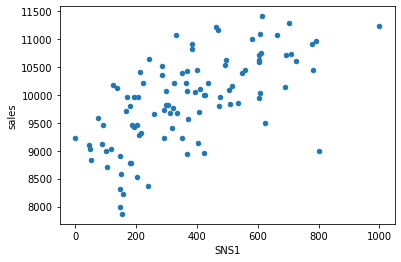

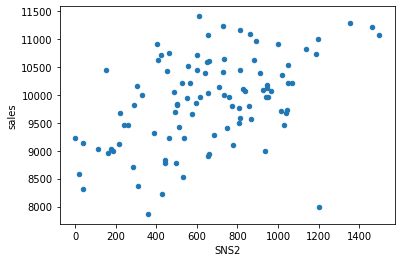

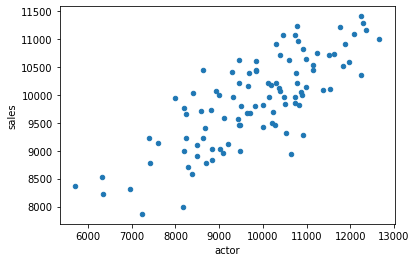

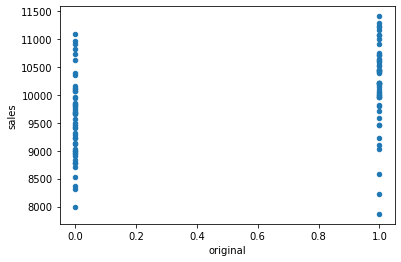

In [ ]:
# dfのカラムをfor文で繰り返す
for name in df.columns:

    # cinema_id列、sales列の散布図は作っても意味が無いので外す
    if name == 'cinema_id' or name == 'sales':
      continue

    # df2のsales列と変数nameの列で散布図を作成する    
    df2.plot(kind = 'scatter', x = name, y = 'sales')

# 実行結果はコード6-5と同じ

## 外れ値の削除

**データフレームから行/列を削除する**  
* df**.drop(インデックス, axis=0)**
* df**.drop(列名, axis=1)**

**データフレームの特定行のインデックスを取得する**  
df**[ bool型のシリーズ ].index**

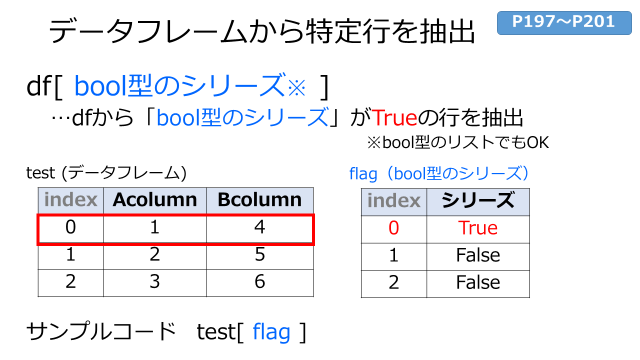

コード6-8 データフレームを作成して特定の行を参照する(P198)

In [ ]:
# 上記のtestの内容のデータフレームを作成する
test = pd.DataFrame(
  {'Acolumn':[1,2,3], 'Bcolumn':[4,5,6]}
)

# データフレームの内容を表示する
test

,Acolumn,Bcolumn
0,1,4
1,2,5
2,3,6


コード6-X3 データフレームにbool型のリストを渡す

In [ ]:
# testにbool型のリストを渡し、1行目だけを取り出す
# test[ [True,False,False] ]
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


▶実行結果  
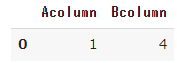

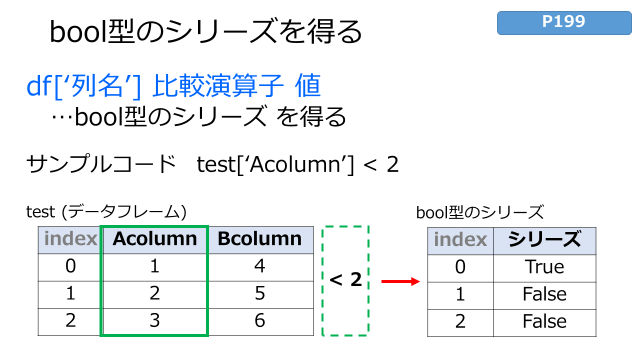

コード6-10 Acolumn列(シリーズ型)に対して比較演算を行う(P199)

In [ ]:
# testのAcolumn列が2未満かどうかを示した、bool型のシリーズを取得する
test['Acolumn'] < 2 

0     True
1    False
2    False
Name: Acolumn, dtype: bool

▶実行結果  
0     True  
1    False  
2    False  
Name: Acolumn, dtype: bool

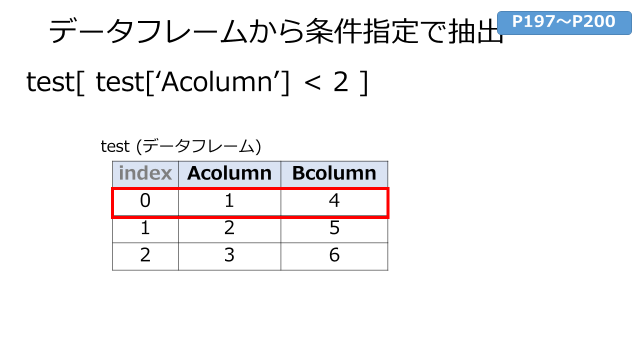

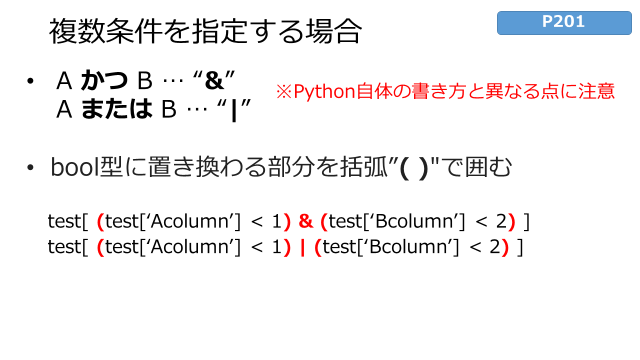

コード6-9 Acolumn列の値が2未満の行だけを参照する(P199)

In [ ]:
# データフレームtestで、Acolumn列が2未満のデータだけを取得する
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


▶実行結果  
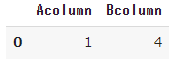

**問1**  
testから、Acolumnが3未満、Bcolumnが5以上のデータを取得してください

In [ ]:
test[(test['Acolumn'] < 3) & (test['Bcolumn'] >= 5)]

,Acolumn,Bcolumn
1,2,5


▶実行結果  

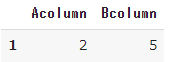

**問2**  
testから、Acolumnが3未満、Bcolumnが5以上のデータを取得してインデックスを表示してください

In [ ]:
no1 = test[(test['Acolumn'] < 3) & (test['Bcolumn'] >= 5)].index
no1

Int64Index([1], dtype='int64')

▶実行結果  
Int64Index([1], dtype='int64')

**問3**  
testからAcolumnが3未満、Bcolumnが5以上のデータを削除してください

In [ ]:
# データフレームを特定し、インデックスを変数noに代入する
# no = test[ (test['Acolumn'] < 3) & (test['Bcolumn'] >= 5)].index
no2 = test.drop(no1, axis = 0)

# 該当行を削除した結果を表示する
# test.drop(no, axis=0)
no2

,Acolumn,Bcolumn
0,1,4
2,3,6


▶実行結果  
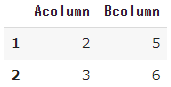

**問4**  
散布図から、外れ値の条件は以下とする
* SNS2列の値が > 1000
* sales列の値が < 8500
* [ここに記述する]列の値が [ここに記述する]
* [ここに記述する]列の値が [ここに記述する]


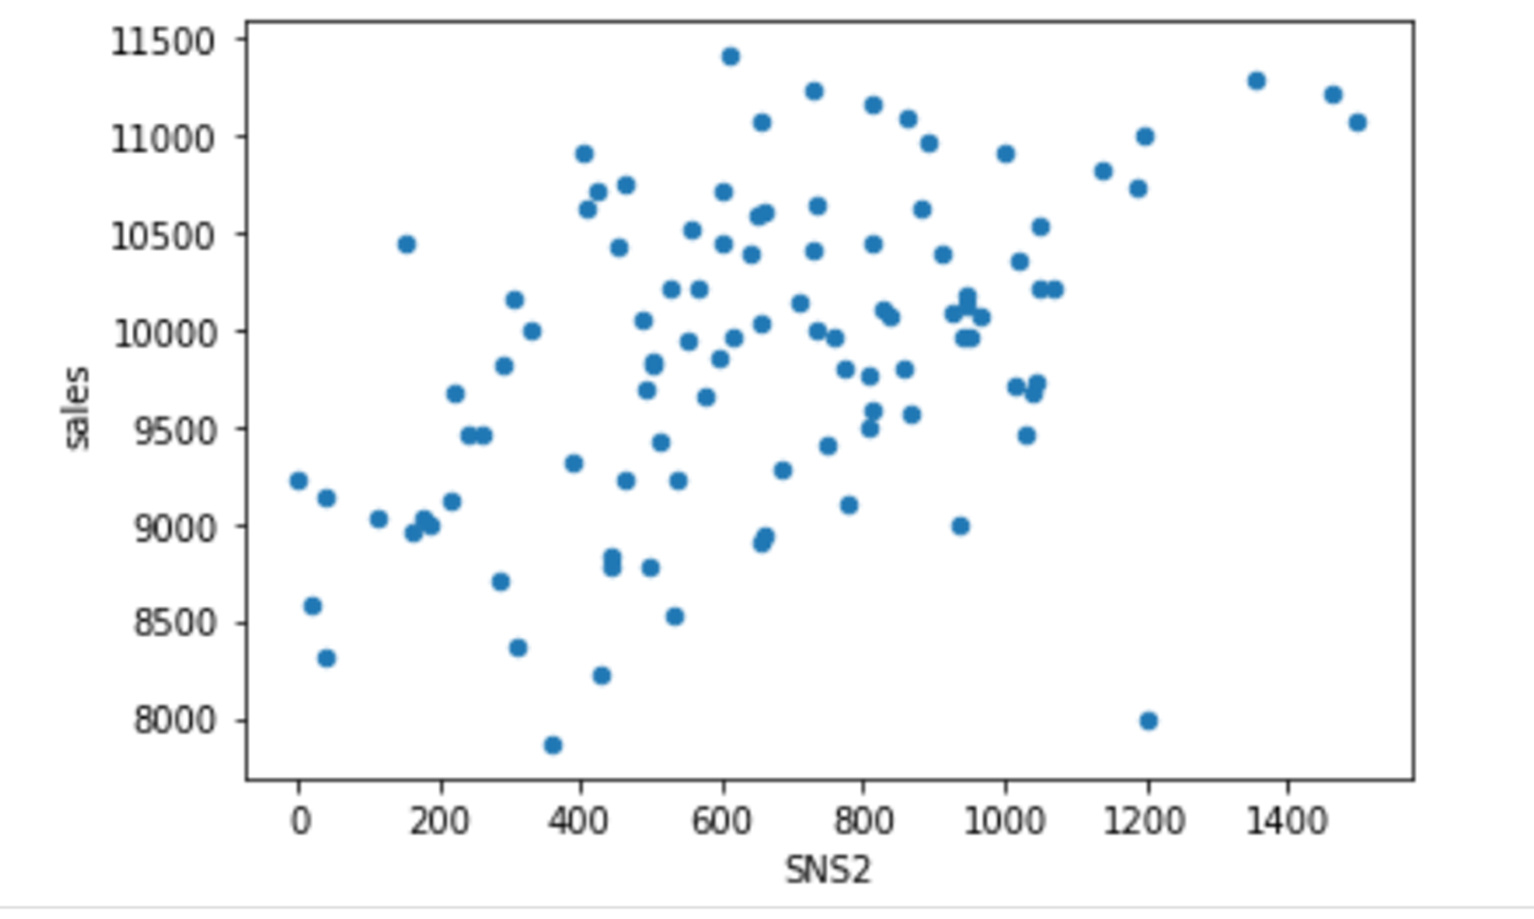

コード6-7 外れ値を削除する(P197) ★

コード6-15 dropメソッドを使って外れ値を削除(P204)

In [ ]:
# データフレームから外れ値データを抽出し、そのインデックスを変数noに代入する
no = df2[(df2['SNS2'] > 1000) & (df['sales'] < 8500 )].index

# インデックスを指定してデータを削除し、結果を変数df3に代入する
df3 = df2.drop(no, axis = 0)

# 行が削除されたかどうかを行数で確認する
df3.shape

(99, 6)

▶実行結果  
(99, 6)

## 特徴量と正解データの取り出し

コード6-16 df3から特徴量の変数xと正解データの変数tに分割(P205)

In [ ]:
# df3から'SNS1','SNS2','actor','original'を取り出し、特徴量xへ代入する
x = df3[['SNS1','SNS2','actor','original']]

# df3から'sales'を取り出し、正解データtへ代入する
t = df3['sales']

**データフレームから特定の範囲を抽出する**  
df**.loc[ インデックス名, 列名 ]**  
インデックス、列に**リスト**や**スライス**を指定することもできる

locでスライス構文を使った場合は、**範囲の最後も含まれる**  
※Pythonの配列と動作が異なる点に注意

コード6-18 特定のデータのみを参照する(P206)

In [ ]:
# df3から、行はインデックス2、4、6、列は'SNS1'、'actor'のものを取得する
df3.loc[[2, 4, 6], ["SNS1", "actor"]]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


コード6-20 データフレームで複数のインデックスや列名を参照する(P208)

In [ ]:
# df3から、行はインデックス0～インデックス3、列は'actor'より左（actor列含む）のものを取得する
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


コード6-21 スライス構文で特徴量と正解データを取り出す(P209)

In [ ]:
# loc機能＋スライス構文で、df3から特徴量を取り出し、変数xに代入する
# 行は全て抜き出す、列は'SNS1'～'original'を抜き出す
x = df3.loc[:, 'SNS1':'original']

# xの先頭5行を表示する
print('特徴量')
print(x.head())


# 正解データ'sales'を変数tに代入する 
t = df3['sales']

# tの先頭5行を表示する
print('正解データ')
print(t.head())

特徴量
    SNS1  SNS2         actor  original
0  291.0  1044   8808.994029         0
1  363.0   568  10290.709370         1
2  158.0   431   6340.388534         1
3  261.0   578   8250.485081         0
4  209.0   683  10908.539550         0
正解データ
0     9731
1    10210
2     8227
3     9658
4     9286
Name: sales, dtype: int64


▶実行結果  
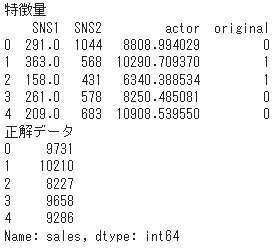

## 訓練データとテストデータの分割

コード6-22 訓練データとテストデータに分割する(P209)

In [ ]:
# train_test_splitをインポートする
from sklearn.model_selection import train_test_split
# __空欄__

# 変数x、変数tを訓練データとテストデータに分割する
# * テストデータを20%とする
# * 乱数シードは0とする
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size = 0.2, random_state = 0)


# xの行数、列数を表示
print('もとの行数、列数')
print(x.shape)

# x_trainの行数、列数を表示
print('訓練データの行数、列数')
print(x_train.shape)

# x_testの行数、列数を表示
print('テストデータの行数、列数')
print(x_test.shape)

もとの行数、列数
(99, 4)
訓練データの行数、列数
(79, 4)
テストデータの行数、列数
(20, 4)


▶実行結果  
もとの行数、列数  
(99, 4)  
訓練データの行数、列数  
(79, 4)  
テストデータの行数、列数  
(20, 4)

# 6.3 モデルの作成と学習

## 線形回帰分析について

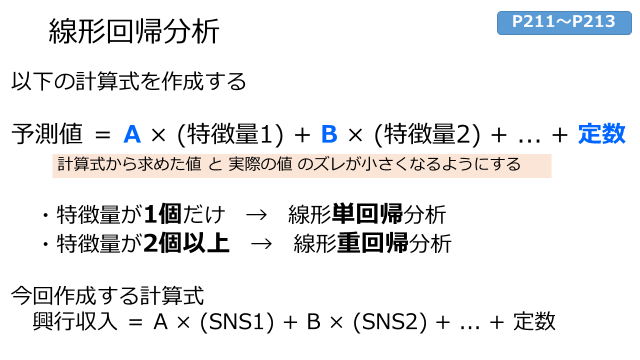

**係数**  
y = **A** × (SNS1) + **B** × (SNS2) + **C** × (actor) + **D** × (original) + 定数  
計算式の **A ～ D** の部分

**切片**  
y = A × (SNS1) + B × (SNS2) + C × (actor) + D × (original) + **定数**  
計算式の **定数** の部分

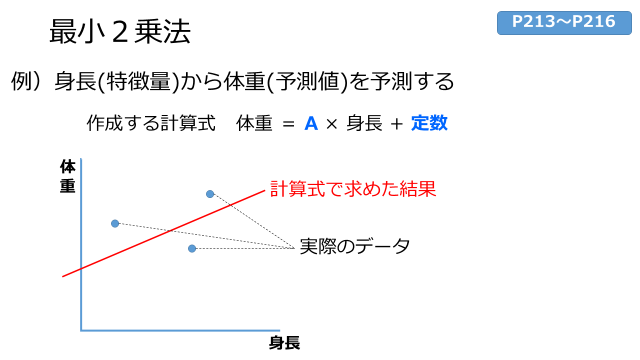

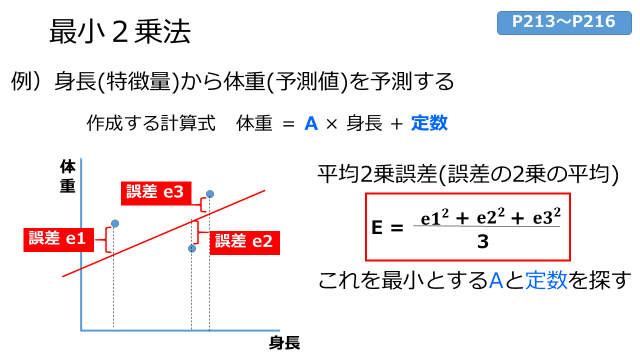

## 重回帰モデルの作成と学習

**線形回帰モデル(回帰)を使用する**  
* LinerRegression関数をインポートする  
 **from sklearn.linear_model import LinearRegression**

* 線形回帰モデルのオブジェクトを作成する  
 **LinearRegression()**

コード6-23 重回帰モデルのLinearRegression関数をインポートする(P217)

コード6-24 LinearRegression関数を使ってモデルを作成する(P217)

コード6-25 fitメソッドでモデルに学習させる(P218)

In [ ]:
# LinerRegression関数をインポートする
from sklearn.linear_model import LinearRegression

# 線形回帰モデルを作成する
model = LinearRegression()

# 訓練データ（特徴量x_train、正解データy_train）を使って、モデルに学習させる
model.fit(x_train, y_train)
model.score(x_train, y_train)

NameError: ignored

以下のデータで予測する

|SNS1|SNS2|actor|original|
|---:|---:|---:|---:|
|150|700|300|0|


コード6-26 興行収入を予測する(P218)

In [ ]:
# 予測データの二次元リストを作成
predict_data = [[150, 700, 300, 0]]

# predict_dataで予測する
model.predict(predict_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([6874.109753])

▶実行結果  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"  
array([6874.109753])

# 6.4 モデルの評価

モデルの評価指標
* 分類 ： 予測の分類結果 が 実際の分類 と一致しているか
* 回帰 ： 予測値 と 実際の値 の誤差がどの程度生じたか
  * **平均2乗誤差**(MSE = mean squared error) … **差分の2乗**の平均
  * **平均絶対誤差**(MAE = mean absolute error) … **差分の絶対値**の平均  
    ※2乗しない分、平均絶対誤差の方が**直感的に理解しやすい**  
    ※妥当性の判断には、正解データに対する知識が必要
  * **決定係数** … 予測値と実測値の誤差の少なさを 0 ～ 1 の数値で表現したもの  
    (誤差が大きい 0 ～ 1 誤差が小さい、0.8以上が精度が高い目安)

コード6-28 平均絶対誤差(MAE)を求める(P222)

In [ ]:
# 関数のインポート
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

# 平均絶対誤差の計算
mean_absolute_error(y_pred = pred, y_true = y_test)

277.1223696408627

コード6-29 scoreメソッド(P224)

In [ ]:
# テストデータ(特徴量x_test、正解データy_test)で決定係数を計算する
model.score(x_test, y_test)

0.7903881596570089

▶実行結果  
0.7903881596570089

## モデルの保存

コード6-30 モデルの保存(P224)

In [ ]:
# pickleをインポート
import pickle

# 'cinema.pkl'という名前でモデルを保存する
with open('cinma.pkl', 'wb') as f:
  pickle.dump(model, f)

# 6.5 回帰式による影響度の分析

**係数を表示する**  
y = **A** × (SNS1) + **B** × (SNS2) + **C** × (actor) + **D** × (original) + 定数  
計算式の **A ～ D** の部分  

model**.coef_**  
係数の絶対値が大きいほど影響度が強い  

**切片を表示する**
y = A × (SNS1) + B × (SNS2) + C × (actor) + D × (original) + **定数**  
計算式の **定数** の部分

model**.intercept_**

コード6-31 係数と切片を確認(P226)

In [ ]:
print('係数')
# 特徴量x_trainの列名を表示する
print(x_train.columns)

# 計算式の係数を表示する
print(model.coef_)

print('切片')
# 計算式の切片の表示
print(model.intercept_)

係数
Index(['SNS1', 'SNS2', 'actor', 'original'], dtype='object')
[  1.07645622   0.53400191   0.28473752 213.95584503]
切片
6253.4187294387075


▶実行結果  
係数  
Index(['SNS1', 'SNS2', 'actor', 'original'], dtype='object')  
[  1.07645622   0.53400191   0.28473752 213.95584503]  
切片  
6253.4187294387075

コード6-32 列と係数を表示する(P227)

In [ ]:
# model.coef_はnumpyの配列で返ってくる。
# これを使用してデータフレームを作成し、変数tmpに代入する
tmp = pd.DataFrame(model.coef_)


# tmpのインデックスに、特徴量x_trainの列名を指定する
tmp.index = x_train.columns

# 作成したデータフレームの列名に、「係数」を指定する
# tmp.columns = ['係数']
tmp['係数'] = model.coef_

# データフレームの内容を表示する
# tmp
pd.DataFrame(tmp.iloc[:, 1])

,係数
SNS1,1.076456
SNS2,0.534002
actor,0.284738
original,213.955845


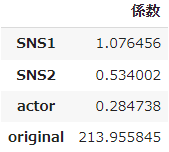